In [17]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

In [18]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
# Check shape of x_train
np.shape(x_train)

(60000, 28, 28)

In [20]:
# Check shape of y_train
np.shape(y_train)

(60000,)

In [21]:
# Check shape of x_test
np.shape(x_test)

(10000, 28, 28)

In [22]:
# Check shape of y_test
np.shape(y_test)

(10000,)

In [23]:
# Check on image matrix
a_train_img = x_train[0]
a_train_img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [24]:
# Check a_train_img shape
np.shape(a_train_img)

(28, 28)

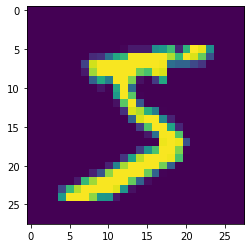

In [25]:
# Check the pixels of this image
plt.imshow(a_train_img)

In [26]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [29]:
# make suare images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape: ", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape:  (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [30]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [36]:
# Build the model
model = keras.Sequential(
[
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax"),
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [49]:
batch_size = 128
epochs = 30

model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
422/422 [==============================] - 22s 50ms/step - loss: 0.0213 - accuracy: 0.9929 - val_loss: 0.0260 - val_accuracy: 0.9930
Epoch 2/30
422/422 [==============================] - 24s 56ms/step - loss: 0.0194 - accuracy: 0.9931 - val_loss: 0.0285 - val_accuracy: 0.9922
Epoch 3/30
422/422 [==============================] - 23s 56ms/step - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.0267 - val_accuracy: 0.9930
Epoch 4/30
422/422 [==============================] - 22s 52ms/step - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0300 - val_accuracy: 0.9935
Epoch 5/30
422/422 [==============================] - 22s 51ms/step - loss: 0.0193 - accuracy: 0.9935 - val_loss: 0.0283 - val_accuracy: 0.9935
Epoch 6/30
422/422 [==============================] - 22s 53ms/step - loss: 0.0193 - accuracy: 0.9934 - val_loss: 0.0266 - val_accuracy: 0.9930
Epoch 7/30
422/422 [==============================] - 23s 54ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0306 - val_accuracy:

In [50]:
# Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.02601272240281105
Test accuracy:  0.9926999807357788


In [51]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


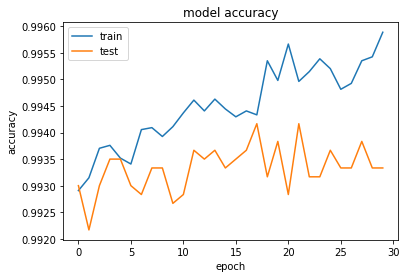

In [52]:
# Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

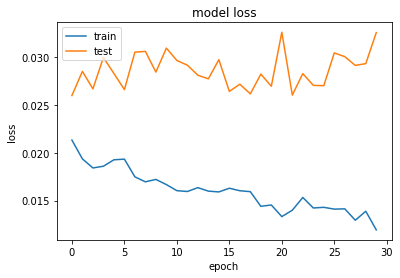

In [53]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()